# CH 11 - Time Series

## 11.1 Date and Time Data Types and Tools

* The Python standard library includes data types for date and time data, as well as calendar-related functionality. The `datetime`, `time`, and `calendar` modules are the main places to start. 

In [165]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
now = dt.datetime.now()
now

datetime.datetime(2020, 7, 30, 10, 13, 33, 257736)

In [166]:
now.year, now.month, now.day

(2020, 7, 30)

#### datetime stores both the date and time down to the microsecond. timedelta represents the temporal difference between two datetime objects

In [167]:
delta = dt.datetime(2011, 1, 7) - dt.datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(days=926, seconds=56700)

In [168]:
delta.days, delta.seconds

(926, 56700)

#### You can add (or subtract) a timedelta or multiple thereof to a datetime object to yield a new shifted object

In [169]:
start = dt.datetime(2011, 1, 7)

start + dt.timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [170]:
start - 2 * dt.timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

### Converting Between String and Datetime

* You can format datetime objects as strings using str or the `strftime` method

In [171]:
stamp = dt.datetime(2011, 1, 3)

print(str(stamp))

print(stamp.strftime('%Y-%m-%d'))

2011-01-03 00:00:00
2011-01-03


#### Datetime format specification (ISO C89 compatible)

|Type|Description|
|---|:--|
|**%Y**|Four-digit year|
|**%y**|Two-digit year|
|**%m**|Two-digit month [01, 12]|
|**%d**|Two-digit day [01, 31]|
|**%H**|Hour (24-hour clock) [00, 23]|
|**%I**|Hour (12-hour clock) [01, 12]|
|**%M**|Two-digit minute [00, 59]|
|**%S**|Second [00, 61] (seconds 60, 61 account for leap seconds)|
|**%w**|Weekday as integer [0 (Sunday), 6]|
|**%U**|Week number of the year [00, 53]; Sunday is considered the first day of the week, and days before the first Sunday |of the year are “week 0”
|**%W**|Week number of the year [00, 53]; Monday is considered the first day of the week, and days before the first Monday |of the year are “week 0”
|**%z**|UTC time zone offset as +HHMM or -HHMM; empty if time zone naive|
|**%F**|Shortcut for %Y-%m-%d (e.g., 2012-4-18)|
|**%D**|Shortcut for %m/%d/%y (e.g., 04/18/12)|

* You can use these same format codes to convert strings to dates using date `time.strptime`

In [172]:
datestrs = ['7/6/2011', '8/6/2011']

[dt.datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

* It can be a bit annoying to have to write a format spec each time, especially for common date formats. In this case, you can use the `parser.parse` method in the third-party `dateutil` package 

In [173]:
from dateutil import parser

print(parser.parse('2011-01-03'))
print(parser.parse('Jan 31, 1997 10:45 PM'))

# In international locales, day appearing before month is very common, 
# so you can pass dayfirst=True to indicate this
print(parser.parse('6/12/2011', dayfirst=True))

2011-01-03 00:00:00
1997-01-31 22:45:00
2011-12-06 00:00:00


* The `pd.to_datetime` pandas method parses many different kinds of date representations. 

In [174]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']

pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

#### It also handles values that should be considered missing (None, empty string, etc.):

In [175]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [176]:
idx[2]

NaT

In [177]:
pd.isnull(idx)

array([False, False,  True])

* `NaT` (Not a Time) is pandas’s null value for timestamp data.

#### Locale-specific date formatting
|Type|Description|
|---|:--|
|**%a**|Abbreviated weekday name|
|**%A**|Full weekday name|
|**%b**|Abbreviated month name|
|**%B**|Full month name|
|**%c**|Full date and time (e.g., ‘Tue 01 May 2012 04:20:57 PM’)|
|**%p**|Locale equivalent of AM or PM|
|**%x**|Locale-appropriate formatted date (e.g., in the United States, May 1, 2012 yields ’05/01/2012’)|
|**%X**|Locale-appropriate time (e.g., ’04:24:12 PM’)|

### 11.2 Time Series Basics

* A basic kind of time series object in pandas is a Series indexed by timestamps, which is often represented external to pandas as Python strings or `datetime` objects

In [178]:
dates = [dt.datetime(2011, 1, 2), dt.datetime(2011, 1, 5),
         dt.datetime(2011, 1, 7), dt.datetime(2011, 1, 8),
         dt.datetime(2011, 1, 10), dt.datetime(2011, 1, 12)]

In [179]:
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02    0.629623
2011-01-05   -0.189836
2011-01-07   -0.006691
2011-01-08    0.863282
2011-01-10    0.041567
2011-01-12    1.085104
dtype: float64

* Under the hood, these datetime objects have been put in a `DatetimeIndex`:

In [180]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

#### pandas stores timestamps using NumPy’s `datetime64` data type at the nanosecond resolution

In [181]:
ts.index.dtype

dtype('<M8[ns]')

#### Scalar values from a DatetimeIndex are pandas Timestamp objects

In [182]:
ts.index[0]

Timestamp('2011-01-02 00:00:00')

### Indexing, Selection, Subsetting

#### Time series behaves like any other pandas.Series when you are indexing and selecting data based on label

In [183]:
stamp = ts.index[2]

ts[stamp]

-0.006691162344104328

#### As a convenience, you can also pass a string that is interpretable as a date

In [184]:
ts['1/10/2011']

0.04156665061698793

In [185]:
ts['20110110']

0.04156665061698793

#### For longer time series, a year or only a year and month can be passed to easily select slices of data

In [186]:
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))

longer_ts.head()

2000-01-01    0.509005
2000-01-02    1.111948
2000-01-03   -0.162319
2000-01-04    0.794986
2000-01-05    0.676500
Freq: D, dtype: float64

In [187]:
longer_ts['2001'].head()

2001-01-01    0.005956
2001-01-02    0.235009
2001-01-03   -1.315814
2001-01-04   -0.053559
2001-01-05    1.883599
Freq: D, dtype: float64

#### This also works if you specify the month 

In [188]:
longer_ts['2001-05'].head()

2001-05-01    0.667781
2001-05-02    0.480623
2001-05-03    1.358448
2001-05-04   -1.116898
2001-05-05    0.529336
Freq: D, dtype: float64

#### Because most time series data is ordered chronologically, you can slice with timestamps not contained in a time series to perform a range query

In [189]:
ts['1/6/2011':'1/11/2011']

2011-01-07   -0.006691
2011-01-08    0.863282
2011-01-10    0.041567
dtype: float64

#### There is an equivalent instance method, truncate, that slices a Series between two dates

In [190]:
ts.truncate(after='1/9/2011')

2011-01-02    0.629623
2011-01-05   -0.189836
2011-01-07   -0.006691
2011-01-08    0.863282
dtype: float64

#### All of this holds true for DataFrame as well, indexing on its rows

In [191]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')

long_df = pd.DataFrame(np.random.randn(100,4),
                       index=dates,
                       columns=['Colorado', 'Texas', 'New York', 'Ohio'])

long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,1.004263,-0.610658,1.622051,0.619050
2001-05-09,-0.822639,0.887834,0.163775,-0.835213
2001-05-16,-0.613294,-0.147085,0.590986,0.009183
2001-05-23,0.295651,0.683535,-0.505048,0.414620
2001-05-30,-0.421465,1.231064,-0.737999,-0.558422


### Time Series with Duplicate Indices

#### In some applications, there may be multiple data observations falling on a particular timestamp. 

In [192]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000', '1/3/2000'])

dup_ts = pd.Series(np.arange(5), index=dates)

dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

* We can tell that the index is not unique by checking its `is_unique` property

In [193]:
dup_ts.index.is_unique

False

#### Suppose you wanted to aggregate the data having non-unique timestamps. 

* One way to do this is to use groupby and pass `level=0` 

In [194]:
grouped = dup_ts.groupby(level=0)

grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## 11.3 Date Ranges, Frequencies, and Shifting

* Generic time series in pandas are assumed to be irregular; that is, they have no fixed frequency.

* Fortunately pandas has a full suite of standard time series frequencies and tools for resampling, inferring frequencies, and generating fixed-frequency date ranges. 

* For example, you can convert the sample time series to be fixed daily frequency by calling `resample`:

In [195]:
ts

2011-01-02    0.629623
2011-01-05   -0.189836
2011-01-07   -0.006691
2011-01-08    0.863282
2011-01-10    0.041567
2011-01-12    1.085104
dtype: float64

In [196]:
# The string 'D' is interpreted as daily frequency
resampler = ts.resample('D')

In [197]:
resampler.sum()

2011-01-02    0.629623
2011-01-03    0.000000
2011-01-04    0.000000
2011-01-05   -0.189836
2011-01-06    0.000000
2011-01-07   -0.006691
2011-01-08    0.863282
2011-01-09    0.000000
2011-01-10    0.041567
2011-01-11    0.000000
2011-01-12    1.085104
Freq: D, dtype: float64

### Generating Date Ranges

* `pandas.date_range` is responsible for generating a DatetimeIndex with an indicated length according to a particular frequency. By default, date_range generates daily timestamps. 

In [198]:
index = pd.date_range('2012-04-01', '2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

* If you pass only a `start` or `end` date, you must pass a number of periods to generate

In [199]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

####  If you wanted a date index containing the last business day of each month, you would pass the 'BM' frequency 

In [200]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

|Alias|Offset type|Description|
|:--|:--|:--|
|**D**|Day|Calendar daily|
|**B**|BusinessDay|Business daily|
|**H**|Hour|Hourly|
|**T**|Minute|Minutely|
|**S**|Second|Secondly|
|**L**|Milli|Millisecond (1/1,000 of 1 second)|
|**U**|Micro|Microsecond (1/1,000,000 of 1 second)|
|**M**|MonthEnd|Last calendar day of month|
|**BM**|BusinessMonthEnd|Last business day (weekday) of month|
|**MS**|MonthBegin|First calendar day of month|
|**BMS**|BusinessMonthBegin|First weekday of month|
|**W-MON, W-TUE, ...**|Week|Weekly on given day of week|
|**WOM-1MON, WOM-2MON, ...**|WeekOfMonth|Weekly dates in the first, ..., fourth week of the month|
|**Q-JAN, Q-FEB, ...**|QuarterEnd|Quarterly dates, last calendar day of each month|
|**BQ-JAN, BQ-FEB, ...**|BusinessQuarterEnd|Quarterly dates, last weekday day of each month|
|**QS-JAN, QS-FEB, ...**|QuarterBegin|Quarterly dates, first calendar day of each month|
|**BQS-JAN, BQS-FEB, ...**|BusinessQuarterBegin|Quarterly dates, first weekday day of each month|
|**A-JAN, A-FEB, ...**|YearEnd|Annual dates, last calendar day of given month|
|**BA-JAN, BA-FEB, ...**|BusinessYearEnd|Annual dates, last weekday of given month|
|**AS-JAN, AS-FEB, ...**|YearBegin|Annual dates, first day of given month|
|**BAS-JAN, BAS-FEB, ...**|BusinessYearBegin|Annual dates, first weekday of given month|

* Sometimes you will have start or end dates with time information but want to generate a set of timestamps normalized to midnight as a convention. To do this, there is a `normalize` option

In [201]:
pd.date_range('2012-05-02 12:05:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### Frequencies and Date Offsets

* Frequencies in pandas are composed of a base frequency and a multiplier. Base fre‐
quencies are typically referred to by a string alias, like 'M' for monthly or 'H' for
hourly. 

In [202]:
from pandas.tseries.offsets import Hour, Minute

In [203]:
hour = Hour()
hour

<Hour>

In [204]:
# You can define a multiple of an offset by passing an integer
four_hours = Hour(4)
four_hours

<4 * Hours>

* In most applications, you would never need to explicitly create one of these objects, instead using a string alias like 'H' or '4H'. Putting an integer before the base frequency creates a multiple

In [205]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

#### Many offsets can be combined together by addition

In [206]:
Hour(2) + Minute(30)

<150 * Minutes>

#### Similarly, you can pass frequency strings, like '1h30min', that will effectively be parsed to the same expression

In [207]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

### Week of month dates

#### One useful frequency class is “week of month,” starting with WOM. This enables you to get dates like the third Friday of each month

In [208]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')

In [209]:
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

### Shifting (Leading and Lagging) Data

* “Shifting” refers to moving data backward and forward through time. Both Series and DataFrame have a `shift` method for doing naive shifts forward or backward, leaving the index unmodified

In [210]:
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31   -0.585855
2000-02-29    0.557108
2000-03-31    0.003823
2000-04-30   -0.664158
Freq: M, dtype: float64

In [211]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.585855
2000-04-30    0.557108
Freq: M, dtype: float64

In [212]:
ts.shift(-2)

2000-01-31    0.003823
2000-02-29   -0.664158
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

#### A common use of shift is computing percent changes in a time series or multiple time series as DataFrame columns. 

In [213]:
# PARECE ERRADO, VERIFICAR
ts / ts.shift(1)  - 1

2000-01-31           NaN
2000-02-29     -1.950931
2000-03-31     -0.993138
2000-04-30   -174.727024
Freq: M, dtype: float64

In [214]:
(-1.25 - 0.05) / .05

-26.0

* Because naive shifts leave the index unmodified, some data is discarded. Thus if the frequency is known, it can be passed to shift to advance the timestamps instead of simply the data 

In [215]:
ts.shift(2, freq='M')

2000-03-31   -0.585855
2000-04-30    0.557108
2000-05-31    0.003823
2000-06-30   -0.664158
Freq: M, dtype: float64

* Other frequencies can be passed, too, giving you some flexibility in how to lead and
lag the data

In [216]:
ts.shift(3, freq='D')

2000-02-03   -0.585855
2000-03-03    0.557108
2000-04-03    0.003823
2000-05-03   -0.664158
dtype: float64

In [217]:
# The T here stands for minutes
ts.shift(1, freq='90T')

2000-01-31 01:30:00   -0.585855
2000-02-29 01:30:00    0.557108
2000-03-31 01:30:00    0.003823
2000-04-30 01:30:00   -0.664158
Freq: M, dtype: float64

### Shifting dates with offsets

* The pandas date offsets can also be used with `datetime` or `Timestamp` objects

In [218]:
from pandas.tseries.offsets import Day, MonthEnd

In [219]:
now = dt.datetime(2011, 11, 17)

In [220]:
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

* If you add an anchored offset like `MonthEnd`, the first increment will “roll forward” a
date to the next date according to the frequency rule

In [221]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [222]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

* Anchored offsets can explicitly “roll” dates forward or backward by simply using their `rollforward` and `rollback` methods, respectively

In [223]:
offset = MonthEnd()

In [224]:
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [225]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

#### A creative use of date offsets is to use these methods with `groupby`

In [226]:
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts[:8]

2000-01-15    1.150851
2000-01-19   -0.931239
2000-01-23    0.053607
2000-01-27    0.567337
2000-01-31    0.503106
2000-02-04   -0.330529
2000-02-08    0.649717
2000-02-12   -0.106511
Freq: 4D, dtype: float64

In [227]:
ts.groupby(offset.rollforward).mean()

2000-01-31    0.268733
2000-02-29   -0.282193
2000-03-31    0.763146
dtype: float64

* Of course, an easier and faster way to do this is using `resample`

In [228]:
ts.resample('M').mean()

2000-01-31    0.268733
2000-02-29   -0.282193
2000-03-31    0.763146
Freq: M, dtype: float64

## 11.4 Time Zone Handling

In [229]:
import pytz

In [230]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [231]:
# To get a time zone object from pytz, use pytz.timezone
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

* Methods in pandas will accept either time zone names or these objects.

### Time Zone Localization and Conversion

#### By default, time series in pandas are time zone naive. The index’s tz field is `None`:

In [232]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')

ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00    0.087925
2012-03-10 09:30:00    0.421196
2012-03-11 09:30:00   -1.100685
2012-03-12 09:30:00    0.118288
2012-03-13 09:30:00   -0.586115
2012-03-14 09:30:00   -0.952707
Freq: D, dtype: float64

In [233]:
print(ts.index.tz)

None


#### Date ranges can be generated with a time zone set

In [234]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

#### Conversion from naive to localized is handled by the `tz_localize` method

In [235]:
ts

2012-03-09 09:30:00    0.087925
2012-03-10 09:30:00    0.421196
2012-03-11 09:30:00   -1.100685
2012-03-12 09:30:00    0.118288
2012-03-13 09:30:00   -0.586115
2012-03-14 09:30:00   -0.952707
Freq: D, dtype: float64

In [236]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00    0.087925
2012-03-10 09:30:00+00:00    0.421196
2012-03-11 09:30:00+00:00   -1.100685
2012-03-12 09:30:00+00:00    0.118288
2012-03-13 09:30:00+00:00   -0.586115
2012-03-14 09:30:00+00:00   -0.952707
Freq: D, dtype: float64

In [237]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

#### Once a time series has been localized to a particular time zone, it can be converted to another time zone with `tz_convert`:

In [238]:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00    0.087925
2012-03-10 04:30:00-05:00    0.421196
2012-03-11 05:30:00-04:00   -1.100685
2012-03-12 05:30:00-04:00    0.118288
2012-03-13 05:30:00-04:00   -0.586115
2012-03-14 05:30:00-04:00   -0.952707
Freq: D, dtype: float64

#### NYC to Berlin

In [239]:
ts_eastern = ts.tz_localize('America/New_York')

ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00    0.087925
2012-03-10 14:30:00+00:00    0.421196
2012-03-11 13:30:00+00:00   -1.100685
2012-03-12 13:30:00+00:00    0.118288
2012-03-13 13:30:00+00:00   -0.586115
2012-03-14 13:30:00+00:00   -0.952707
Freq: D, dtype: float64

In [240]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00    0.087925
2012-03-10 15:30:00+01:00    0.421196
2012-03-11 14:30:00+01:00   -1.100685
2012-03-12 14:30:00+01:00    0.118288
2012-03-13 14:30:00+01:00   -0.586115
2012-03-14 14:30:00+01:00   -0.952707
Freq: D, dtype: float64

#### `tz_localize` and `tz_convert` are also instance methods on `DatetimeIndex`

In [241]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

### Operations with Time Zone−Aware Timestamp Objects

In [242]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp

Timestamp('2011-03-12 04:00:00')

In [243]:
stamp_utc = stamp.tz_localize('utc')
stamp_utc

Timestamp('2011-03-12 04:00:00+0000', tz='UTC')

In [244]:
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

#### You can also pass a time zone when creating the `Timestamp`

In [245]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

#### pandas respects daylight saving time transitions where possible. First, 30 minutes before transitioning to DST:

In [246]:
from pandas.tseries.offsets import Hour

In [247]:
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [248]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

#### Then, 90 minutes before transitioning out of DST:

In [249]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [250]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### Operations Between Different Time Zones

#### If two time series with different time zones are combined, the result will be UTC.

In [251]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')

ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00   -0.693465
2012-03-08 09:30:00    0.583836
2012-03-09 09:30:00   -0.608336
2012-03-12 09:30:00   -0.241168
2012-03-13 09:30:00   -0.777041
2012-03-14 09:30:00   -0.405854
2012-03-15 09:30:00   -0.627104
2012-03-16 09:30:00   -0.387708
2012-03-19 09:30:00    0.424909
2012-03-20 09:30:00    0.209519
Freq: B, dtype: float64

In [252]:
ts1 = ts[:7].tz_localize('Europe/London')

ts2 = ts1[2:].tz_convert('Europe/Moscow')

result = ts1 + ts2

result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

## 11.5 Periods and Period Arithmetic

#### Periods represent timespans, like days, months, quarters, or years. The `Period` class represents this data type, requiring a string or integer and a frequency

In [253]:
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

* (is this true? I don't know) In this case, the Period object represents the full timespan from January 1, 2007, to December 31, 2007, inclusive.

In [254]:
# adding and subtracting integers from periods has the effect of shifting by their frequency
p+5, p-2

(Period('2012', 'A-DEC'), Period('2005', 'A-DEC'))

* If two periods have the same frequency, their difference is the number of units between them

In [255]:
pd.Period('2014', freq='A-DEC') - p

<7 * YearEnds: month=12>

#### Regular ranges of periods can be constructed with the `period_range` function

In [256]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

#### The `PeriodIndex` class stores a sequence of periods and can serve as an axis index in any pandas data structure

In [257]:
pd.Series(np.random.randn(6), index=rng)

2000-01   -1.164899
2000-02    0.141187
2000-03   -1.058948
2000-04   -0.027509
2000-05    0.324439
2000-06   -1.327862
Freq: M, dtype: float64

In [258]:
# If you have an array of strings, you can also use the PeriodIndex class
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')

index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### Period Frequency Conversion

#### Periods and `PeriodIndex` objects can be converted to another frequency with their `asfreq` method

In [259]:
p = pd.Period('2007', freq='A-DEC')
p

Period('2007', 'A-DEC')

In [260]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [261]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

### See book for illustrations of periods

* When you are converting from high to low frequency, pandas determines the superperiod depending on where the subperiod “belongs.” For example, in A-JUN frequency, the month Aug-2007 is actually part of the 2008 period

In [262]:
p = pd.Period('Aug-2007', 'M')

p.asfreq('A-JUN')

Period('2008', 'A-JUN')

#### Whole `PeriodIndex` objects or time series can be similarly converted with the same semantics

In [263]:
rng = pd.period_range('2006', '2009', freq='A-DEC')

ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2006    0.290679
2007   -0.199694
2008   -1.012863
2009   -0.707978
Freq: A-DEC, dtype: float64

In [264]:
ts.asfreq('M', how='start')

2006-01    0.290679
2007-01   -0.199694
2008-01   -1.012863
2009-01   -0.707978
Freq: M, dtype: float64

#### If we instead wanted the last business day of each year, we can use the `'B'` frequency and indicate that we want the end of the period

In [265]:
ts.asfreq('B', how='end')

2006-12-29    0.290679
2007-12-31   -0.199694
2008-12-31   -1.012863
2009-12-31   -0.707978
Freq: B, dtype: float64

### Quarterly Period Frequencies

*  Much quarterly
data is reported relative to a fiscal year end, typically the last calendar or business day
of one of the 12 months of the year. Thus, the period 2012Q4 has a different meaning
depending on fiscal year end. pandas supports all 12 possible quarterly frequencies as
Q-JAN through Q-DEC

#### See book for illustrations

In [266]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [267]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [268]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

*  It’s possible to do easy period arithmetic; for example, to get the timestamp at 4PM on the second-to-last business day of the quarter, you could do:

In [269]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
p4pm

Period('2012-01-30 16:00', 'T')

In [270]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

#### You can generate quarterly ranges using `period_range`.

In [271]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')

ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2011Q3   -0.476608
2011Q4    0.195585
2012Q1   -0.317645
2012Q2    0.974171
2012Q3    1.084188
2012Q4   -1.057830
Freq: Q-JAN, dtype: float64

In [272]:
new_rng = (rng.asfreq('B', 'e') -1).asfreq('T', 's') + 16 * 60

ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00   -0.476608
2011-01-28 16:00:00    0.195585
2011-04-28 16:00:00   -0.317645
2011-07-28 16:00:00    0.974171
2011-10-28 16:00:00    1.084188
2012-01-30 16:00:00   -1.057830
dtype: float64

### Converting Timestamps to Periods (and Back)

#### Series and DataFrame objects indexed by timestamps can be converted to periods with the `to_period` method

In [273]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')

ts = pd.Series(np.random.randn(3), index=rng)
ts

2000-01-31   -0.287187
2000-02-29    0.502416
2000-03-31    2.146574
Freq: M, dtype: float64

In [274]:
pts = ts.to_period()
pts

2000-01   -0.287187
2000-02    0.502416
2000-03    2.146574
Freq: M, dtype: float64

#### There is also no problem with having duplicate periods in the result

In [275]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')

ts2 = pd.Series(np.random.randn(6), index=rng)
ts2

2000-01-29   -1.902034
2000-01-30   -0.659404
2000-01-31   -1.310059
2000-02-01    0.772814
2000-02-02   -1.152356
2000-02-03   -0.778796
Freq: D, dtype: float64

In [276]:
ts2.to_period('M')

2000-01   -1.902034
2000-01   -0.659404
2000-01   -1.310059
2000-02    0.772814
2000-02   -1.152356
2000-02   -0.778796
Freq: M, dtype: float64

#### To convert back to timestamps, use `to_timestamp`

In [277]:
pts = ts2.to_period()
pts

2000-01-29   -1.902034
2000-01-30   -0.659404
2000-01-31   -1.310059
2000-02-01    0.772814
2000-02-02   -1.152356
2000-02-03   -0.778796
Freq: D, dtype: float64

In [278]:
pts.to_timestamp(how='end')

2000-01-29 23:59:59.999999999   -1.902034
2000-01-30 23:59:59.999999999   -0.659404
2000-01-31 23:59:59.999999999   -1.310059
2000-02-01 23:59:59.999999999    0.772814
2000-02-02 23:59:59.999999999   -1.152356
2000-02-03 23:59:59.999999999   -0.778796
Freq: D, dtype: float64

### Creating a PeriodIndex from Arrays

#### Fixed frequency datasets are sometimes stored with timespan information spread across multiple columns. 

In [279]:
data = pd.read_csv('examples/macrodata.csv')

data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


#### By passing these arrays to `PeriodIndex` with a frequency, you can combine them to form an index for the DataFrame

In [280]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [281]:
data.index = index

data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


## 11.6 Resampling and Frequency Conversion

* `pandas` objects are equipped with a `resample` method, which is the workhorse function for all frequency conversion. `resample` has a similar API to `groupby`; you call `resample` to group the data, then call an aggregation function

In [282]:
rng = pd.date_range('2001-01-01', periods=100, freq='D')

In [283]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2001-01-01   -1.282841
2001-01-02    1.100452
2001-01-03    1.036570
2001-01-04   -0.559297
2001-01-05   -1.592572
                ...   
2001-04-06   -0.782280
2001-04-07    1.785958
2001-04-08    2.926230
2001-04-09   -2.219410
2001-04-10    0.124839
Freq: D, Length: 100, dtype: float64

In [284]:
ts.resample('M').mean()

2001-01-31    0.308824
2001-02-28    0.079667
2001-03-31   -0.253511
2001-04-30    0.197188
Freq: M, dtype: float64

In [285]:
ts.resample('M', kind='period').mean()

2001-01    0.308824
2001-02    0.079667
2001-03   -0.253511
2001-04    0.197188
Freq: M, dtype: float64

#### Table 11-5. Resample method arguments
|Argument|Description|
|--:|:--|
|**freq**| String or DateOffset indicating desired resampled frequency (e.g., ‘M', ’5min', or Second(15))|
|**axis**| Axis to resample on; default axis=0|
|**fill_method**| How to interpolate when upsampling, as in 'ffill' or 'bfill'; by default does no interpolation|
|**closed**| In downsampling, which end of each interval is closed (inclusive), 'right' or 'left'|
|**label**| In downsampling, how to label the aggregated result, with the 'right' or 'left' bin edge (e.g., the 9:30 to 9:35 five-minute interval could be labeled 9:30 or 9:35)|
|**loffset**| Time adjustment to the bin labels, such as '-1s' / Second(-1) to shift the aggregate labels one second earlier|
|**limit**| When forward or backward filling, the maximum number of periods to fill|
|**kind**| Aggregate to periods ('period') or timestamps ('timestamp'); defaults to the type of index the time series has|
|**convention**| When resampling periods, the convention ('start' or 'end') for converting the low-frequency period to high frequency; defaults to 'end'|

### Downsampling

#### There are a couple things to think about when using `resample` to downsample data:
* Which side of each interval is *closed*
* How to label each aggregated bin, either with the start of the interval or the end

In [286]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')

ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

#### Suppose you wanted to aggregate this data into five-minute chunks or bars by taking the sum of each group

In [287]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

#### By default, the left bin edge is inclusive, so the 00:00 value is included in the 00:00 to 00:05 interval. Passing closed='right' changes the interval to be closed on the right

In [288]:
ts.resample('5min', closed='left').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

#### The resulting time series is labeled by the timestamps from the left side of each bin. By passing label='right' you can label them with the right bin edge

In [289]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

#### Lastly, you might want to shift the result index by some amount, say subtracting one second from the right edge

In [290]:
ts.resample('5min', closed='right', label='right', loffset='-1s').sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int64

* You also could have accomplished the effect of loffset by calling the `shift` method on the result without the `loffset`.

### Open-High-Low-Close (OHLC) resampling

#### By using the ohlc aggregate function you will obtain a DataFrame having columns containing these four aggregates

In [291]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


### Upsampling and Interpolation

In [292]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000',  periods=2,
                                         freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,1.558664,2.605819,-1.123224,0.444211
2000-01-12,-1.340198,1.951213,0.603045,4.222235


* When you are using an aggregation function with this data, there is only one value per group, and missing values result in the gaps. We use the `asfreq` method to convert to the higher frequency without any aggregation

In [293]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,1.558664,2.605819,-1.123224,0.444211
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-1.340198,1.951213,0.603045,4.222235


#### Suppose you wanted to fill forward each weekly value on the non-Wednesdays. 

In [294]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,1.558664,2.605819,-1.123224,0.444211
2000-01-06,1.558664,2.605819,-1.123224,0.444211
2000-01-07,1.558664,2.605819,-1.123224,0.444211
2000-01-08,1.558664,2.605819,-1.123224,0.444211
2000-01-09,1.558664,2.605819,-1.123224,0.444211
2000-01-10,1.558664,2.605819,-1.123224,0.444211
2000-01-11,1.558664,2.605819,-1.123224,0.444211
2000-01-12,-1.340198,1.951213,0.603045,4.222235


#### You can similarly choose to only fill a certain number of periods forward to limit how far to continue using an observed value

In [295]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,1.558664,2.605819,-1.123224,0.444211
2000-01-06,1.558664,2.605819,-1.123224,0.444211
2000-01-07,1.558664,2.605819,-1.123224,0.444211
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-1.340198,1.951213,0.603045,4.222235


In [296]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,1.558664,2.605819,-1.123224,0.444211
2000-01-13,-1.340198,1.951213,0.603045,4.222235


### Resampling with Pandas

In [297]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001', freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,0.591524,-2.141614,-0.959480,1.227017
2000-02,0.654985,0.671409,-0.041291,0.454660
2000-03,0.810561,-0.183424,0.019664,-0.192759
2000-04,1.039996,0.026611,-0.677828,-0.536878
2000-05,-0.359783,0.651347,0.797889,0.819720


In [298]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.455264,-0.182950,0.016962,0.480199
2001,0.529985,0.135166,0.208718,0.040128


* Upsampling is more nuanced, as you must make a decision about which end of the timespan in the new frequency to place the values before resampling, just like the `asfreq` method. The `convention` argument defaults to `'start'` but can also be `'end'`.

In [299]:
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.455264,-0.182950,0.016962,0.480199
2000Q2,0.455264,-0.182950,0.016962,0.480199
2000Q3,0.455264,-0.182950,0.016962,0.480199
2000Q4,0.455264,-0.182950,0.016962,0.480199
2001Q1,0.529985,0.135166,0.208718,0.040128
2001Q2,0.529985,0.135166,0.208718,0.040128
2001Q3,0.529985,0.135166,0.208718,0.040128
2001Q4,0.529985,0.135166,0.208718,0.040128


In [300]:
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.455264,-0.182950,0.016962,0.480199
2001Q1,0.455264,-0.182950,0.016962,0.480199
2001Q2,0.455264,-0.182950,0.016962,0.480199
2001Q3,0.455264,-0.182950,0.016962,0.480199
2001Q4,0.529985,0.135166,0.208718,0.040128


#### Since periods refer to timespans, the rules about upsampling and downsampling are more rigid:

* In *downsampling*, the target frequency must be a **subperiod** of the source frequency.
* In *upsampling*, the target frequency must be a **superperiod** of the source frequency.

If these rules are not satisfied, an exception will be raised. This mainly affects the
quarterly, annual, and weekly frequencies; for example, the timespans defined by `Q-MAR` only line up with `A-MAR`, `A-JUN`, `A-SEP`, and `A-DEC`.

In [301]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.455264,-0.182950,0.016962,0.480199
2001Q1,0.455264,-0.182950,0.016962,0.480199
2001Q2,0.455264,-0.182950,0.016962,0.480199
2001Q3,0.455264,-0.182950,0.016962,0.480199
2001Q4,0.529985,0.135166,0.208718,0.040128
2002Q1,0.529985,0.135166,0.208718,0.040128
2002Q2,0.529985,0.135166,0.208718,0.040128
2002Q3,0.529985,0.135166,0.208718,0.040128


## 11.7 Moving Window Functions

In [302]:
close_px_all = pd.read_csv('examples/stock_px_2.csv',
                           parse_dates=True, index_col=0)

In [303]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]

In [304]:
close_px = close_px.resample('B').ffill()

#### The rolling operator behaves similarly to resample and groupby 

#### It can be called on a Series or DataFrame along with a window (expressed as a number of periods)

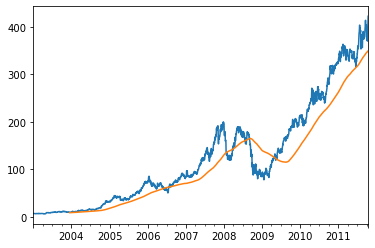

In [305]:
close_px.AAPL.plot()

close_px.AAPL.rolling(250).mean().plot()

* This behavior can be changed to account for missing data and, in particular, the fact that you will have fewer than `window` periods of data at the beginning of the time series

In [306]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()

In [307]:
appl_std250[5:20]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
2003-01-20    0.132011
2003-01-21    0.149286
2003-01-22    0.169008
2003-01-23    0.168760
2003-01-24    0.184135
2003-01-27    0.182546
2003-01-28    0.178117
2003-01-29    0.181870
Freq: B, Name: AAPL, dtype: float64

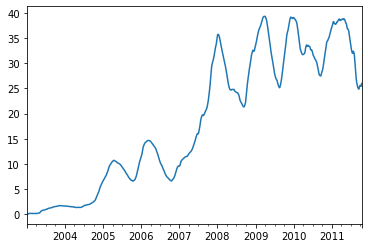

In [308]:
appl_std250.plot()

* In order to compute an *expanding window mean*, use the `expanding` operator instead of `rolling`. The expanding mean starts the time window from the beginning of the time series and increases the size of the window until it encompasses the whole series

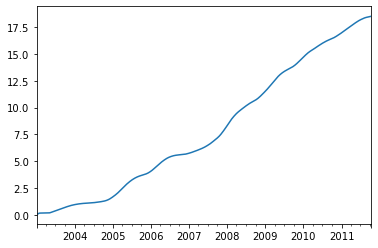

In [309]:
expanding_mean = appl_std250.expanding().mean()

expanding_mean.plot()

#### Calling a moving window function on a DataFrame applies the transformation to each column

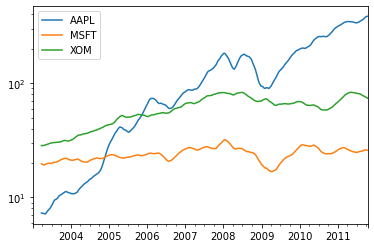

In [310]:
close_px.rolling(60).mean().plot(logy=True)

* The rolling function also accepts a string indicating a fixed-size time offset rather than a set number of periods. Using this notation can be useful for irregular time series. 

In [311]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


### Exponentially Weighted Functions

* An alternative to using a static window size with equally weighted observations is to specify a constant decay factor to give more weight to more recent observations. There are a couple of ways to specify the decay factor. A popular one is using a span, which makes the result comparable to a simple moving window function with window size equal to the span.
* Since an exponentially weighted statistic places more weight on more recent observations, it “adapts” faster to changes compared with the equal-weighted version. `pandas` has the `ewm` operator to go along with `rolling` and `expanding`. 

In [312]:
aapl_px = close_px.AAPL['2006':'2007']

In [313]:
ma60 = aapl_px.rolling(30, min_periods=20).mean()
ewma60 = aapl_px.ewm(span=30).mean()

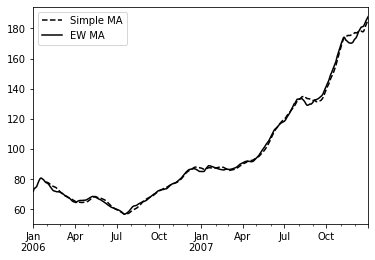

In [314]:
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k-', label='EW MA')
plt.legend()

### Binary Moving Window Functions

* Some statistical operators, like correlation and covariance, need to operate on two time series. As an example, financial analysts are often interested in a stock’s correlation to a benchmark index like the S&P 500. To have a look at this, we first compute the percent change for all of our time series of interest

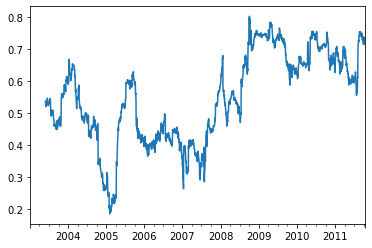

In [319]:
spx_px = close_px_all['SPX']

spx_rets = spx_px.pct_change()

returns = close_px.pct_change()

# Passing a Series
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)

corr.plot()

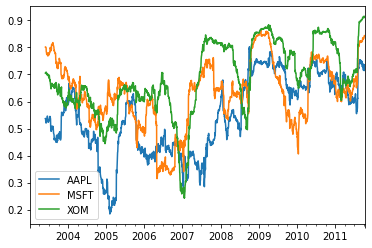

In [320]:
# Passing a DataFrame
corr = returns.rolling(125, min_periods=100).corr(spx_rets)

corr.plot()

### User-Defined Moving Window Functions

* The apply method on rolling and related methods provides a means to apply an array function of your own devising over a moving window. The only requirement is that the function produce a single value (a reduction) from each piece of the array. For example, while we can compute sample quantiles using rolling(...).quantile(q), we might be interested in the percentile rank of a particular value over the sample. The scipy.stats.percentileofscore function does just this.

In [323]:
returns.AAPL

2003-01-02         NaN
2003-01-03    0.006757
2003-01-06    0.000000
2003-01-07   -0.002685
2003-01-08   -0.020188
                ...   
2011-10-10    0.051406
2011-10-11    0.029526
2011-10-12    0.004747
2011-10-13    0.015515
2011-10-14    0.033225
Freq: B, Name: AAPL, Length: 2292, dtype: float64

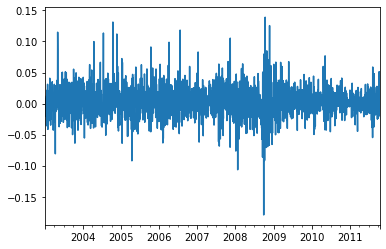

In [324]:
returns.AAPL.plot()

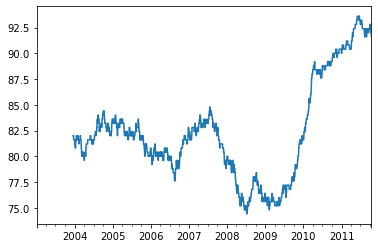

In [322]:
from scipy.stats import percentileofscore

score_at_2percent = lambda x: percentileofscore(x, 0.02)

result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot()